<a href="https://colab.research.google.com/github/sumeyrasyn/EvaluatingGoodnessofFit/blob/main/numeric.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 2(Interpolation)

## Libraries

In [ ]:
from numpy import arange
import numpy as np
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
import pandas as pd
from scipy.interpolate import CubicSpline

## Question 2 - a

### Data

In [ ]:
x_true = [4.0,4.2, 4.5, 4.7, 5.1, 5.5, 5.9, 6.3, 6.8, 7.1 ]

y_true = [102.56, 113.18, 130.11, 142.05, 167.53, 195.14, 224.87, 256.73, 299.5,326.72]

### Helper Functions

In [ ]:
def second_degree(x, a, b, c):
	return a * x + b * x**2 + c

def first_degree(x, a, b):
	return a * x + b

def third_degree(x, a, b, c, d):
	return (a * x) + (b * x**2) + (c * x**3) + d

def exponential(x, a, b):
     return b * (x**a)

def natural_exponential(x, a, b):
    return b * np.exp(a * x)

def print_statistics(y_true, y_pred):
    y_pred_d = pd.DataFrame(y_pred,columns=["Pi"])
    y_true_d = pd.DataFrame(y_true,columns=["Yi"])
    Y = pd.concat([y_true_d, y_pred_d],axis=1)
    Y.index = ["1", "2", "3","4","5","6","7","8","9","10"]
    Y['Yi-Pi'] = (Y['Yi'] - Y['Pi'])
    Y['(Yi-Pi)^2'] = ((Y['Yi'] - Y['Pi'])**2)
    print(Y)
    print("total error:",mean_squared_error(y_true, y_pred)*10)

### **1)Second Degree**


y = -1.14352 * x + 6.61821 * x^2 + 1.23556


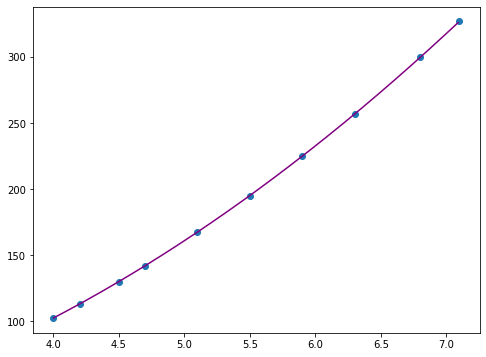

        Yi          Pi     Yi-Pi  (Yi-Pi)^2
1   102.56  102.552842  0.007158   0.000051
2   113.18  113.178003  0.001997   0.000004
3   130.11  130.108476  0.001524   0.000002
4   142.05  142.057280 -0.007280   0.000053
5   167.53  167.543257 -0.013257   0.000176
6   195.14  195.147062 -0.007062   0.000050
7   224.87  224.868695  0.001305   0.000002
8   256.73  256.708154  0.021846   0.000477
9   299.50  299.485674  0.014326   0.000205
10  326.72  326.740557 -0.020557   0.000423
total error: 0.0014429128859492798


In [ ]:
# curve fit
popt, _ = curve_fit(second_degree, x_true, y_true)
# summarize the parameter values
a, b, c = popt
print('y = %.5f * x + %.5f * x^2 + %.5f' % (a, b, c))
plt.figure(figsize=(8,6))
plt.scatter(x_true, y_true)
# define a sequence of inputs between the smallest and largest known inputs
x_line = arange(min(x_true), max(x_true), 0.01)
# calculate the output for the range
y_line = second_degree(x_line, a, b, c)
# create a line plot for the mapping function
plt.plot(x_line, y_line, color='purple')
plt.show()

y_pred = []

for i in x_true:
   y_pred.append(a * i + b *i**2 + c)

print_statistics(y_true, y_pred)

### **2)First Degree**

y = 72.08452 * x + -194.13824


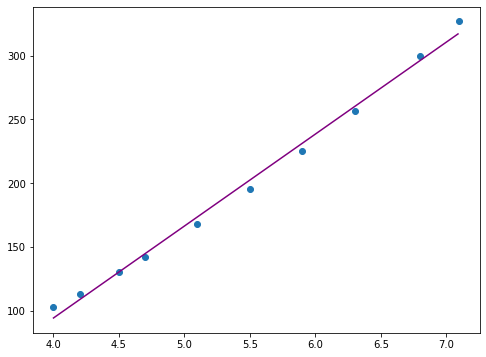

        Yi          Pi     Yi-Pi  (Yi-Pi)^2
1   102.56   94.199830  8.360170  69.892441
2   113.18  108.616734  4.563266  20.823400
3   130.11  130.242089 -0.132089   0.017447
4   142.05  144.658992 -2.608992   6.806842
5   167.53  173.492800 -5.962800  35.554978
6   195.14  202.326607 -7.186607  51.647314
7   224.87  231.160414 -6.290414  39.569304
8   256.73  259.994221 -3.264221  10.655137
9   299.50  296.036480  3.463520  11.995974
10  326.72  317.661835  9.058165  82.050356
total error: 329.0131930338979


In [ ]:
popt, _ = curve_fit(first_degree, x_true, y_true)
# summarize the parameter values
a, b = popt
print('y = %.5f * x + %.5f' % (a, b))
# plot input vs output
plt.figure(figsize=(8,6))
plt.scatter(x_true, y_true)
# define a sequence of inputs between the smallest and largest known inputs
x_line = arange(min(x_true), max(x_true), 0.01)
# calculate the output for the range
y_line = first_degree(x_line, a, b)
# create a line plot for the mapping function
plt.plot(x_line, y_line, color='purple')
plt.show()

y_pred = []

for i in x_true:
   y_pred.append(a * i + b)

print_statistics(y_true, y_pred)

### **3)Third Degree**

y = -2.37919 * x + 6.84557*x^2 + -0.01367*x^3 + 3.42904


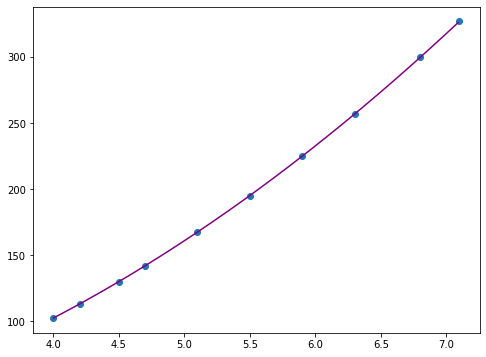

        Yi          Pi     Yi-Pi     (Yi-Pi)^2
1   102.56  102.566282 -0.006282  3.946170e-05
2   113.18  113.179236  0.000764  5.829966e-07
3   130.11  130.099455  0.010545  1.112013e-04
4   142.05  142.045834  0.004166  1.735455e-05
5   167.53  167.534600 -0.004600  2.116137e-05
6   195.14  195.147000 -0.007000  4.900370e-05
7   224.87  224.877784 -0.007784  6.058372e-05
8   256.73  256.721699  0.008301  6.890483e-05
9   299.50  299.490186  0.009814  9.630766e-05
10  326.72  326.727923 -0.007923  6.277943e-05
total error: 0.0005273412035343702


In [ ]:
# curve fit
popt, _ = curve_fit(third_degree, x_true, y_true)
# summarize the parameter values
a, b, c, d = popt
print('y = %.5f * x + %.5f*x^2 + %.5f*x^3 + %.5f' % (a, b,c,d))
# plot input vs output
plt.figure(figsize=(8,6))
plt.scatter(x_true, y_true)
# define a sequence of inputs between the smallest and largest known inputs
x_line = arange(min(x_true), max(x_true),0.01)
# calculate the output for the range
y_line = third_degree(x_line, a, b, c, d)
# create a line plot for the mapping function
plt.plot(x_line, y_line, color='purple')
plt.show()

y_pred = []

for i in x_true:
   y_pred.append(a * i + b * i**2 + c * i**3 + d)

print_statistics(y_true, y_pred)

## Question 2 - b

### **1) be^(ax)**

     xi      yi   xi^2      lnyi     xilnyi
1   4.0  102.56  16.00  4.630448  18.521792
2   4.2  113.18  17.64  4.728979  19.861714
3   4.5  130.11  20.25  4.868380  21.907711
4   4.7  142.05  22.09  4.956179  23.294042
5   5.1  167.53  26.01  5.121162  26.117928
6   5.5  195.14  30.25  5.273717  29.005445
7   5.9  224.87  34.81  5.415522  31.951582
8   6.3  256.73  39.69  5.548025  34.952557
9   6.8  299.50  46.24  5.702114  38.774378
10  7.1  326.72  50.41  5.789104  41.102635
Total xi:  54.099999999999994
Total lnyi:  52.03363186805591
Total xilnyi:  285.48978480323655
Total xi^2:  303.39
a = 0.3723817720659319
b = 24.258760258657123


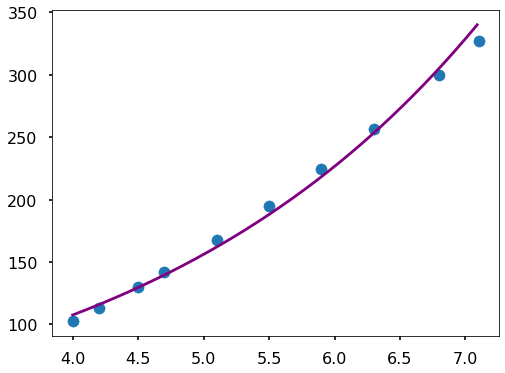

        Yi          Pi      Yi-Pi   (Yi-Pi)^2
1   102.56  107.587545  -5.027545   25.276209
2   113.18  115.906200  -2.726200    7.432166
3   130.11  129.605572   0.504428    0.254448
4   142.05  139.626658   2.423342    5.872589
5   167.53  162.053226   5.476774   29.995052
6   195.14  188.081908   7.058092   49.816669
7   224.87  218.291266   6.578734   43.279737
8   256.73  253.352795   3.377205   11.405514
9   299.50  305.201999  -5.701999   32.512795
10  326.72  341.274924 -14.554924  211.845817
total error: 417.690995377621
a = 0.35551, b = 26.75749


In [ ]:
y = pd.DataFrame(y_true,columns=["yi"])
x = pd.DataFrame(x_true,columns=["xi"])
Y = pd.concat([x, y],axis=1)
Y.index = ['1', '2', "3","4","5","6","7","8","9","10"]
Y['xi^2'] = (Y['xi']**2 )
Y["lnyi"] = (np.log(Y["yi"]))
Y["xilnyi"]=(Y["xi"]*Y["lnyi"])
print(Y)
print("Total xi: ", Y["xi"].sum())
print("Total lnyi: " , Y["lnyi"].sum())
print("Total xilnyi: " , Y["xilnyi"].sum())
print("Total xi^2: ", Y["xi^2"].sum())
a = ((10 * Y["xilnyi"].sum()-Y["xi"].sum()*Y["lnyi"].sum())/(10*303.39 - (Y["xi"].sum()**2)))
b = np.exp((Y["xi^2"].sum() * Y["lnyi"].sum() - Y["xilnyi"].sum()*Y["xi"].sum())/(10 * Y["xi^2"].sum() -  Y["xi"].sum()**2))
print("a =", a)
print("b =", b)

plt.figure(figsize=(8,6))
plt.scatter(x_true, y_true)
# define a sequence of inputs between the smallest and largest known inputs
x_line = arange(min(x_true), max(x_true), 0.01)
# calculate the output for the range
y_line = natural_exponential(x_line, a, b)
# create a line plot for the mapping function
plt.plot(x_line, y_line, color='purple')
plt.show()

y_pred = []

for i in x_true:
   y_pred.append(b * np.exp(i * a)) 

print_statistics(y_true, y_pred)

### **2) bx^a**

[2.01924439 6.24226468]
y = 6.24226 * x^2.01924 



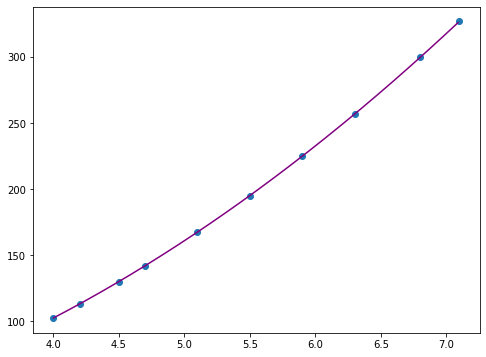

        Yi          Pi     Yi-Pi  (Yi-Pi)^2
1   102.56  102.576633 -0.016633   0.000277
2   113.18  113.196973 -0.016973   0.000288
3   130.11  130.118152 -0.008152   0.000066
4   142.05  142.060066 -0.010066   0.000101
5   167.53  167.532585 -0.002585   0.000007
6   195.14  195.126111  0.013889   0.000193
7   224.87  224.843730  0.026270   0.000690
8   256.73  256.688317  0.041683   0.001737
9   299.50  299.489178  0.010822   0.000117
10  326.72  326.768983 -0.048983   0.002399
total error: 0.005876205980682495


In [ ]:
popt, _ = curve_fit(exponential, x_true, y_true)
# summarize the parameter values
a, b = popt
print(popt)
print('y = %.5f * x^%.5f \n' % (b, a))
# plot input vs output
plt.figure(figsize=(8,6))
plt.scatter(x_true, y_true)
# define a sequence of inputs between the smallest and largest known inputs
x_line = arange(min(x_true), max(x_true),0.01)
# calculate the output for the range
y_line = exponential(x_line, a, b)
# create a line plot for the mapping function
plt.plot(x_line, y_line, color='purple')
plt.show()

y_pred=[]

for i in x_true:
   y_pred.append(b * (i**a)) 

print_statistics(y_true, y_pred)

# Question 7(Natural Cubic Spline)




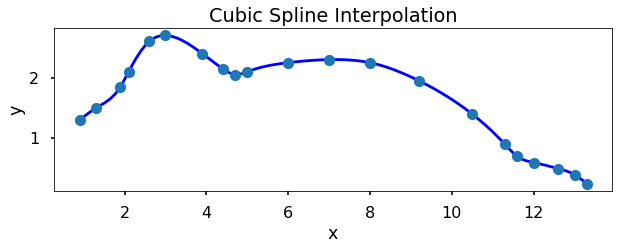

In [ ]:
plt.style.use('seaborn-poster')
x= [0.9, 1.3, 1.9, 2.1, 2.6, 3.0, 3.9, 4.4, 4.7, 5.0, 6.0, 7.0, 8.0, 9.2, 10.5, 11.3, 11.6, 12.0, 12.6, 13.0, 13.3 ]
ycubic= [1.3, 1.5, 1.85, 2.1, 2.6, 2.7, 2.4, 2.15, 2.05, 2.1, 2.25, 2.3, 2.25, 1.95, 1.4, 0.9, 0.7, 0.6, 0.5, 0.4, 0.25]

f = CubicSpline(x, ycubic, bc_type=((2, 0.0), (2, 0.0)))
x_new = np.linspace(min(x), max(x),100)
y_new = f(x_new)

plt.figure(figsize = (10,3))
plt.plot(x_new, y_new,'b')
plt.plot(x, ycubic,'o')
plt.title('Cubic Spline Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.show()